In [1]:
from utils.utils import *

structures_path = "1.Minimal_structures/Minimal_structures"

Cif.path = structures_path
Cif.original_cifs_path = "/home/fnerin/Desktop/allodb_new/src/data" # <pdb>_updated.cif.gz

# allodb

In [2]:
import sys
sys.path.append("..")

from src import *

db.init('../database.db')
dbpdbs = set(i.entry_id for i in PDB.select())
db.close()

True

# Data

In [3]:
clustersf = "2.Clustering/mmseqs2/clusters.pkl"

representatives = pd.read_pickle(clustersf).pdb.unique().tolist()

representatives

['6ta3',
 '5kwj',
 '6t4k',
 '5mo6',
 '3o0n',
 '1tjp',
 '2nw8',
 '4bqh',
 '1og0',
 '3s8b',
 '6ncf',
 '5jv1',
 '3auy',
 '5dl1',
 '7bhu',
 '1qqb',
 '2p5m',
 '6hgj',
 '4aau',
 '4cff',
 '7juv',
 '4mbs',
 '6nzf',
 '3zkr',
 '5uyy',
 '5xez',
 '2b08',
 '2c2b',
 '1raf',
 '5mfv',
 '2xje',
 '3i0s',
 '4dpq',
 '2d5x',
 '7amj',
 '2qmx',
 '3e5u',
 '6q4k',
 '4bo1',
 '6mo1',
 '2him',
 '2poc',
 '5ja7',
 '6rkw',
 '5aa4',
 '4yw8',
 '5fts',
 '5h08',
 '5olk',
 '3kq7',
 '2qei',
 '8jii',
 '3u18',
 '5y66',
 '6pgr',
 '2ha2',
 '5dzh',
 '7anw',
 '6kx3',
 '6e5g',
 '4pcu',
 '6bky',
 '1hak',
 '6gfm',
 '4ejl',
 '5lu8',
 '1fx2',
 '6fmz',
 '5f2e',
 '1o0s',
 '5w40',
 '6r4d',
 '7ehm',
 '6o0h',
 '4a79',
 '3dc2',
 '6ueg',
 '3kh5',
 '6u26',
 '8hnn',
 '5ngz',
 '7mew',
 '5m1a',
 '3nwy',
 '4q0a',
 '3rhw',
 '3smq',
 '5hue',
 '4lrl',
 '5urj',
 '7ofu',
 '6huj',
 '1hkb',
 '2ldb',
 '2cdq',
 '5lvx',
 '2dz9',
 '1njj',
 '3la2',
 '1uxq',
 '1vst',
 '4mdk',
 '6bvn',
 '1jlr',
 '5fii',
 '6sbv',
 '4bxc',
 '5ifu',
 '7ljc',
 '2jfz',
 '6o0n',
 

In [4]:
seqsf = "2.Clustering/seqs.pkl"

with open(seqsf, "rb") as f:
    seqs = {}
    for (pdb, entity_id, asym_id), seq in tqdm(pickle.load(f).items(), smoothing=0):
        if pdb in representatives:
            if pdb not in seqs:
                seqs[pdb] = {}
            seqs[pdb][entity_id] = seq
        
seqs

  0%|          | 0/3518 [00:00<?, ?it/s]

{'5kwj': {'1': 'MFSRPGLPVEYLQVPSASMGRDIKVQFQGGGPHAVYLLDGLRAQDDYNGWDINTPAFEEYYQSGLSVIMPVGGQSSFYTDWYQPSQSNGQNYTYKWETFLTREMPAWLQANKGVSPTGNAAVGLSMSGGSALILAAYYPQQFPYAASLSGFLNPSEGWWPTLIGLAMNDSGGYNANSMWGPSSDPAWKRNDPMVQIPRLVANNTRIWVYCGNGTPSDLGGDNIPAKFLEGLTLRTNQTFRDTYAADGGRNGVFNFPPNGTHSWPYWNEQLVAMKADIQHVLNGATPPAAPAAPAALEHHHHHH'},
 '6t4k': {'1': 'GSSHHHHHHSSGLVPRGSHMASLTEIEHLVQSVCKSYRETCQLRLEDLLRQRSNIFSREEVTGYQRKSMWEMWERCAHHLTEAIQYVVEFAKRLSGFMELCQNDQIVLLKAGAMEVVLVRMCRAYNADNRTVFFEGKYGGMELFRALGCSELISSIFDFSHSLSALHFSEDEIALYTALVLINAHRPGLQEKRKVEQLQYNLELAFHHHLHKTHRQSILAKLPPKGKLRSLCSQHVERLQIFQHLHPIVVQAAFPPLYKELFS'},
 '5mo6': {'1': 'GSMDIEFDDDADDDGSGSGSGSGSSGPVPSRARVYTDVNTHRPSEYWDYESHVVEWGNQDDYQLVRKLGRGKYSEVFEAINITNNEKVVVKILKPVKKKKIKREIKILENLRGGPNIITLADIVKDPVSRTPALVFEHVNNTDFKQLYQTLTDYDIRFYMYEILKALDYCHSMGIMHRDVKPHNVMIDHEHRKLRLIDWGLAEFYHPGQEYNVRVASRYFKGPELLVDYQMYDYSLDMWSLGCMLASMIFRKEPFFHGHDNYDQLVRIAKVLGTEDLYDYIDKYNIELDPRFNDILGRHSRKRWERFVHSENQHLVSPEALDFLDKLLRYDHQSRLTAREAMEHPYFYTVVK'},
 '3o0n': {'1': 'MKLSDL

In [5]:
len(seqs)

431

# PDB search

In [6]:
extra_path = "7.Extra_set"

os.makedirs(extra_path, exist_ok=True)

In [7]:
extra_original_cifs_path = f"{extra_path}/origcifs"
os.makedirs(extra_original_cifs_path, exist_ok=True)

extra_structures_path = f"{extra_path}/cifs"
os.makedirs(extra_structures_path, exist_ok=True)

extra_pockets_path = f"{extra_path}/pockets"
os.makedirs(extra_pockets_path, exist_ok=True)

extra_features_path = extra_path
os.makedirs(f"{extra_features_path}/features", exist_ok=True)

In [8]:
from utils.new_pdbs import Pdb

In [9]:
Cif.path = extra_structures_path
Cif.original_cifs_path = extra_original_cifs_path # <pdb>_updated.cif.gz
Pdb.path = extra_structures_path

## Query

In [10]:
from rcsbsearchapi.search import AttributeQuery, TextQuery

In [11]:
text = TextQuery("alloster*")

new = AttributeQuery(
            attribute="rcsb_accession_info.initial_release_date",
            operator="greater",
            value="2023-09-09||"
        )

In [10]:
searchf = f"{extra_path}/pdbs_search.pkl"

if not os.path.isfile(searchf):
    search = list( (text & new)() )
    existing = [p for p in search if p.lower() in dbpdbs]
    print("Already in db:", existing)
    search = sorted( set(search) - set(existing) )
    
    with open(searchf, "wb") as f:
        pickle.dump(search, f)
        
else:
    with open(searchf, "rb") as f:
        search = pickle.load(f)

len(search), search

(463,
 ['7FQH',
  '7FQI',
  '7FQJ',
  '7FQK',
  '7FQL',
  '7GQS',
  '7GQT',
  '7GQU',
  '7GS7',
  '7GS8',
  '7GS9',
  '7GSA',
  '7GSB',
  '7GSC',
  '7GSD',
  '7GSE',
  '7GSF',
  '7GSG',
  '7GSH',
  '7GSI',
  '7GSJ',
  '7GSK',
  '7GSL',
  '7GSM',
  '7GSN',
  '7GSO',
  '7GSQ',
  '7GSR',
  '7GST',
  '7GSU',
  '7GSV',
  '7GSW',
  '7GSX',
  '7GSY',
  '7GSZ',
  '7GT0',
  '7GT1',
  '7GT2',
  '7GT3',
  '7GT4',
  '7GT5',
  '7GT6',
  '7GT7',
  '7GT8',
  '7GT9',
  '7GTA',
  '7GTB',
  '7GTC',
  '7GTD',
  '7GTE',
  '7GTF',
  '7GTG',
  '7GTH',
  '7GTI',
  '7GTJ',
  '7GTK',
  '7GTL',
  '7GTM',
  '7GTN',
  '7GTO',
  '7GTP',
  '7GTQ',
  '7GTR',
  '7GTS',
  '7GTT',
  '7GTU',
  '7GTV',
  '7GTW',
  '7GTX',
  '7GTY',
  '7GTZ',
  '7GU0',
  '7GU1',
  '7GU2',
  '7GU3',
  '7GU4',
  '7GU5',
  '7GU6',
  '7GU7',
  '7GU8',
  '7GU9',
  '7GUA',
  '7GUB',
  '7GUC',
  '7UMB',
  '7X6S',
  '7X6V',
  '7YG5',
  '7YNZ',
  '7YO0',
  '7YO1',
  '7YO2',
  '7YO4',
  '7YO5',
  '8BD2',
  '8BE2',
  '8BE3',
  '8BE4',
  '8BE5',
  '8

## Sequence identities

In [13]:
from biotite.sequence import ProteinSequence
from biotite.sequence.align import align_optimal, SubstitutionMatrix, get_sequence_identity

In [14]:
# Sequence identities with cluster representatives

def get_ids(seq):
    return tuple(
        (
            otherpdb,
            entity,
            pd.Series((
                get_sequence_identity(al) 
                    for al in align_optimal(
                        ProteinSequence(seq.replace("U", "X")),
                        ProteinSequence(otherseq),
                        SubstitutionMatrix.std_protein_matrix(),
                        max_number=10
                    )
            )).mean()
        )
            for otherpdb, entities in seqs.items()
                for entity, otherseq in entities.items()
    )

In [25]:
for pdb in tqdm(search, smoothing=0):
    newpdb = Pdb(pdb.lower())
    
    newp = newpdb
    try:
        if newpdb.assembly is not None and newpdb.assembly._repetitions is None:
            newp = newpdb.assembly
    except:
        with newpdb._extended_temp_ciff({
            "_atom_site": newpdb.atoms.query("pdbx_PDB_model_num == '1'").to_dict(orient="list")
        }) as f:
            newpdb.cif._cif_content = gzip.compress(f.read().encode())
        if newpdb.assembly is not None and newpdb.assembly._repetitions is None:
            newp = newpdb.assembly

    for i, entity in (
        newpdb._entities
        .query(f"type == 'polypeptide(L)' and entity_id in {newp.residues.label_entity_id.unique().tolist()}")
        .iterrows()
    ):
        maxid = max(get_ids( entity["pdbx_seq_one_letter_code_can"].replace("\n", "") ), key=lambda x: x[-1])
        print(newpdb.entry_id.upper(), entity["entity_id"], f"- {maxid[-1]} seq id with cluster rep {maxid[0].upper()} {maxid[1]}")
        if maxid[-1] < 0.6: print("\n")

  0%|          | 0/463 [00:00<?, ?it/s]

7FQH 1 - 0.8036494816891121 seq id with cluster rep 5LU8 2
7FQI 1 - 0.8036494816891121 seq id with cluster rep 5LU8 2
7FQJ 1 - 0.8036494816891121 seq id with cluster rep 5LU8 2
7FQK 1 - 0.8036494816891121 seq id with cluster rep 5LU8 2
7FQL 1 - 0.8036494816891121 seq id with cluster rep 5LU8 2
7GQS 1 - 0.299143789203134 seq id with cluster rep 7AUD 1


7GQT 1 - 0.299143789203134 seq id with cluster rep 7AUD 1


7GQU 1 - 0.299143789203134 seq id with cluster rep 7AUD 1


7GS7 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GS8 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GS9 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GSA 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GSB 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GSC 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GSD 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GSE 1 - 0.9937694704049844 seq id with cluster rep 6W30 1
7GSF 1 - 0.9937694704049844 seq id with cluster rep 6

# Extra set

In [20]:
news = {
    "7GQU": {'label_asym_id': ['D']}, # Werner helicase
    
    # next: modulator small protein
    "7X6V": {'label_asym_id': ['A']}, # lymphocytic choriomeningitis virus RNA-dependent RNA polymerase (LCMV-L protein)
    
    "7YG5": {'label_asym_id': ['V']}, ## (weird that it's not in already) voltage-gated CaV2.3-alpha2/delta1-beta1 channel

    # "7YNZ", "7YO*" are too compex and don't have primary reference
    # "8BE2" has a nanobody but is not allosteric; other structures have an allosteric nanobody but also KRas which is already in the database

    # 8BO9 does not have an allosteric modulator, but 8AQ6 from the same primary reference does
    # "8AQI": [{'label_asym_id': ['I']}, {'label_asym_id': ['Y']}], # NanoLuc luciferase, two sites so skipped
    "8AQ6": {'label_asym_id': ['IA']}, # NanoLuc luciferase

    # "8BWF": # PTBP1; all the stapled peptides are allosteric modulators but they are multiple sites :(
    
    # "8CGP": [{'label_asym_id': ['AA']}, {'label_asym_id': ['LA']}], # Insulin regulated aminopeptidase, two sites so skipped
    "8CGW": {'label_asym_id': ['P']}, # Insulin regulated aminopeptidase

    # "8CM*" describe an allosteric redox switch, no modulators
    # 8D3* describe a fragment screening with small probes
    # 8EI* do not describe allosteric modulators
    # "8EPK":  [{'label_asym_id': ['E']}, {'label_asym_id': ['F']}], # coagulation factor IXa (there are other CFs in the database), two sites so skipped
    
    "8F4S": {'label_asym_id': ['D']}, # SARS-CoV-2 2'-O-Methyltransferase
    # "8F4Y":  [{'label_asym_id': ['E']}, {'label_asym_id': ['R']}, {'label_asym_id': ['S']}, {'label_asym_id': ['D']}], # multiple sites so skipped

    # 8GIL/8GJB does not have a primary reference
    # 8HMG does not have a primary reference
    # 8HX* does not discuss allosteric modulators
    # "8IKH" and "8IKG" are GPCRs and the receptor entity has high seq id with representatives
    # 8j6h and 8jb3: ATP (not in structures) and inosine are modulators but it's fuzzy
    # "8J6P", "8J6Q", "8J6R" the GPCR entity has again high sequence identity
    # 8JBB, 8JBC, 8JH1: the paper discusses allosteric conformational change induced by a substrate
    # 8JNA, 8JNB, 8JOF, 8JOG are small chimeras

    "8JP0": {'label_asym_id': ['B']}, # Sodium/calcium exchanger 1

    # 8JV5 and 8JV6 are purinergic receptors with rather considerable sequence id with representatives
    # 8JZ7 again a GPCR entity already in db
    
    "8K9L": {'label_asym_id': ['G']}, # Mu-type opioid receptor

    # 8KI4, (8W4V, 8W8K) do not discuss allosteric modulators
    # 8OMI does not have the bound inhibitor
    # 8OO*: 8OOO and 8OOQ have AKG (2-oxoglutarate) as modulator but there are multiple # Methanothermococcus thermolithotrophicus Glutamine synthetase
    # 8OS5 does not have allosteric modulators
    # 8P* also have allosteric sites but multiple :( # anaerobic ribonucleotide reductase (modulators ATP and dATP bind to the ATP-cone)
    # 8PR7 does not have primary reference
    # 8PT4 does not have modulators
    # 8PW3 (and 8QQ* and others) also have multiple allosteric sites :( # Mycobacterium smegmatis inosine monophosphate dehydrogenase regulated by GTP and pppGpp)
    # 8Q3C discusses allostery but does not have allosteric modulators
    # 8QA* also have multiple allosteric sites :( # Methylenetetrahydrofolate reductase with a regulatory domain that binds the substrate
    # 8QDQ and 8QDR do not have allosteric modulators
    
    # 8QEZ does have an allosteric modulator but the seq id with a rep might be too high
    "8QEZ": {'label_asym_id': ['M', 'U']}, # AMPA receptor GluA2
    
    # 8QGY does not have the allosteric protein discussed

    "8QNI": {'label_asym_id': ['B']}, # E3 ubiquitin ligase Cbl-b # allostericity confirmed by a citing review 10.1016/j.bmc.2024.117677

    # peptide/protein modulator
    "8QNS": {'label_asym_id': ['E']}, # apoptosis inducing factor (AIF)

    # 8QOD, 8QQ6 have entities with high seq id with representatives
    # "8QQI": [{'label_asym_id': ['G']}, {'label_asym_id': ['I']}], # E.coli DNA gyrase, two sites so skipped
    # 8QQ* and others (also above) also have multiple allosteric sites :( # Mycobacterium smegmatis inosine monophosphate dehydrogenase regulated by GTP and pppGpp
    # 8QT* are again E3 ubiquitin ligase Cbl-b
    # 8QUC and 8QUD have multiple allosteric sites :( # voltage-gated K + (Kv) channel
    # 8QYT and 8QYW do not have the molecule bound in the allosteric site

    # two different allosteric nanobodies in the structure:
    "8R4B": [{'label_asym_id': ['B']}, {'label_asym_id': ['C']}], # Roco protein from C. tepidum; 8R4C and 8R4D are related structures

    # 8RS5 and 8RWL does not have primary reference
    # 8SZ* have multiple allosteric sites :( # cinacalcet-bound human calcium-sensing receptor
    # 8T5B has an entity with high seq id with representatives
    
    # 8TB0 has a related structure with an allosteric modulator (G-protein competitive)
    "8TB7": [{'label_asym_id': ['E']}], # GPR61

    # 8TG9 has entities with high seq id with representatives
    # 8TK3 does not have primary reference    
    # "8TM7": [{'label_asym_id': ['F']}, {'label_asym_id': ['L']}], # Nicotinamide Phosphoribosyltransferase, two sites so skipped
    # 8TQB and 8TRC (and 8TR0 and 8TR2, and 8TRC, 8TRD) # metabotropic glutamate receptor, two sites so skipped
    # 8TQO and 8TQZ do not have allosteric modulators
    # 8TR0 and 8TR2 (and 8TQB and 8TRC) above
    # 8TR5 (and 8TR*) and 8V4S prurinergic receptor, multiple sites and similar one is already on database
    # 8U1X and 8U89 do not have allosteric modulators
    # 8U8J, 8U8K have competitive inhibitors
    # 8UGW does not have a primary reference

    "8UK6": {'label_asym_id': ['C']}, # Candida albicans glutaminyl tRNA synthetase (GLN4)
    
    # 8UP1, 8URE, 8UTM # "8URE" has modulator. Designed allosteric proteins (Baker lab); multiple sites so skipped
    # 8UY1, 8UY2 have multiple sites so skipped
    # 8V4S above
    # 8V4X has an entity (the main protein) with high seq id with a representative

    # 8V7Z is related to the following structure
    "8V81": {'label_asym_id': ['L']}, # CFTR

    # 8VQ3 and 8VQ4 have an entity with high seq id with a representative (CDK2)
    
    # 8VS* have an entity with high seq id with a representative (integrin), but this protein is the modulator in this case:
    "8VSD": {'label_asym_id': ['B', 'C']}, # Transforming growth factor beta-1

    # 8W4V (and 8KI4, 8W8K) do not discuss allosteric modulators
    # 8W6* 8W6G discsses an allosteric modulator but has multiple sites so skipped
    # 8W8K above
    # 8W9M is related to 8WM7 and 8WM8, and 8WM7 does have an allosteric protein bound, but it has multiple sites so skipped
    # 8WCJ does not have allosteric modulators
    
    # 8WG* have structure 8WGB with an allosteric modulator, alhtough there might be similar proteins in the database
    "8WGB": {'label_asym_id': ['H']}, # mGlu2-4 heterodimer

    # 8WI* have an entity with high seq id with a representative
    # 8WM7 and 8WM8; 8WM7 has an allosteric protein bound, but it has multiple sites so skipped
    # 8WPU has an entity with high seq id with a representative

    # 8X0* has multiple structures of mGlus with modulators but a lot have multiple binding sites
    "8X0F": {'label_asym_id': ['E']}, # Metabotropic glutamate receptor 5, mGlu5-5M

    # 8X89 does not have allosteric modulators
    # 8XLR does not have a primary reference
    # 8XX0 has a very complex allosteric mechanism
    # 8Y1V has an entity with a high seq id with a representative
    # 8YHO and 8YHX have multiple sites so skipped
    # 8YPJ does not have allosteric modulators
    # 8ZKV and 8ZLV do not have primary reference
    # 9AXL has an entity with high seq id with a representative
    # 9B3* structures either do not have allosteric modulators or have multiple sites
    
    "9B96": {'label_asym_id': ['B']}, # Peptidyl arginine deiminase
    # 9B97 and 9B98 related to above

    # 9BJA does not have a primary reference
    
    "9BJK": {'label_asym_id': ['D']}, # Mu-type opioid receptor

    # 9BS2 does not have a primary reference
    # 9C2A, B and C are prurinergic receptors with considerable seq id with a representative
    # 9CBZ and 9CC2 do not have allosteric modulators

    # peptide modulator;  related to 9CKF and 9CKG
    "9CKC": {'label_asym_id': ['E']}, # SET-domain protein lysine methyltransferase
    
    # two different modulators in each structure / the entity with high seq id is an antibody
    "9D3E": [{'label_asym_id': ['F']}, {'label_asym_id': ['G']}], # CCR6
    # "9D3G": [{'label_asym_id': ['F']}, {'label_asym_id': ['G']}], 

    "9DNM": {'label_asym_id': ['D']}, # beta-arrestin 1

    # 9DU7 has multiple sites so skipped
    # 9DX* has multiple sites for the allosteric modulator 2J9 so skipped
    # 9EE* does not have allosteric modulators in the structures
    # 9EMA and 9EMC # RUVBL1/2 with multiple sites
    # 9EMM and 9EMN have a very complex allosteric mechanism
    # 9END (and 8RS5 and 8RWL) do not have allosteric modulators

    # allosteric VHH antibody; related to 9FVC and 9FVE
    "9FVB": {'label_asym_id': ['C']}, # VcSiaP

    # related to 9IVG
    "9IVM": {'label_asym_id': ['G']}, # GLP-1R-Gs complex; the high seq id entities are antibodies
}

len(news), news

(25,
 {'7GQU': {'label_asym_id': ['D']},
  '7X6V': {'label_asym_id': ['A']},
  '7YG5': {'label_asym_id': ['V']},
  '8AQ6': {'label_asym_id': ['IA']},
  '8CGW': {'label_asym_id': ['P']},
  '8F4S': {'label_asym_id': ['D']},
  '8JP0': {'label_asym_id': ['B']},
  '8K9L': {'label_asym_id': ['G']},
  '8QEZ': {'label_asym_id': ['M', 'U']},
  '8QNI': {'label_asym_id': ['B']},
  '8QNS': {'label_asym_id': ['E']},
  '8R4B': [{'label_asym_id': ['B']}, {'label_asym_id': ['C']}],
  '8TB7': [{'label_asym_id': ['E']}],
  '8UK6': {'label_asym_id': ['C']},
  '8V81': {'label_asym_id': ['L']},
  '8VSD': {'label_asym_id': ['B', 'C']},
  '8WGB': {'label_asym_id': ['H']},
  '8X0F': {'label_asym_id': ['E']},
  '9B96': {'label_asym_id': ['B']},
  '9BJK': {'label_asym_id': ['D']},
  '9CKC': {'label_asym_id': ['E']},
  '9D3E': [{'label_asym_id': ['F']}, {'label_asym_id': ['G']}],
  '9DNM': {'label_asym_id': ['D']},
  '9FVB': {'label_asym_id': ['C']},
  '9IVM': {'label_asym_id': ['G']}})

In [11]:
newsf = f"{extra_path}/news.pkl"

if not os.path.isfile(newsf):    
    with open(newsf, "wb") as f:
        pickle.dump(news, f)   
else:
    with open(newsf, "rb") as f:
        news = pickle.load(f)

news

{'7GQU': {'label_asym_id': ['D']},
 '7X6V': {'label_asym_id': ['A']},
 '7YG5': {'label_asym_id': ['V']},
 '8AQ6': {'label_asym_id': ['IA']},
 '8CGW': {'label_asym_id': ['P']},
 '8F4S': {'label_asym_id': ['D']},
 '8JP0': {'label_asym_id': ['B']},
 '8K9L': {'label_asym_id': ['G']},
 '8QEZ': {'label_asym_id': ['M', 'U']},
 '8QNI': {'label_asym_id': ['B']},
 '8QNS': {'label_asym_id': ['E']},
 '8R4B': [{'label_asym_id': ['B']}, {'label_asym_id': ['C']}],
 '8TB7': [{'label_asym_id': ['E']}],
 '8UK6': {'label_asym_id': ['C']},
 '8V81': {'label_asym_id': ['L']},
 '8VSD': {'label_asym_id': ['B', 'C']},
 '8WGB': {'label_asym_id': ['H']},
 '8X0F': {'label_asym_id': ['E']},
 '9B96': {'label_asym_id': ['B']},
 '9BJK': {'label_asym_id': ['D']},
 '9CKC': {'label_asym_id': ['E']},
 '9D3E': [{'label_asym_id': ['F']}, {'label_asym_id': ['G']}],
 '9DNM': {'label_asym_id': ['D']},
 '9FVB': {'label_asym_id': ['C']},
 '9IVM': {'label_asym_id': ['G']}}

# "Minimal" structures

## Structure selection and saving

In [10]:
def get_assembly_structure(pdb, mods): # -> (pdb, mods)
    p = pdb
    # Get assembly IDs where modulator chains are present
    ass_ids = {
        tuple(mod["label_asym_id"]): ass["assembly_id"] 
        for mod in mods
        for ass in pdb._assembly_asyms.to_dict(orient="records")
        if all(m in ass["asym_id_list"].split(',') for m in mod["label_asym_id"])
    }
    if len(ass_ids) != len(mods):
        print("Some of the annotated modulators are not as-is in a single assembly", pdb.entry_id)
        if len(ass_ids) == 0:
            ass_ids = {
                tuple(mod["label_asym_id"]): ass["assembly_id"] 
                for mod in mods
                for ass in pdb._assembly_asyms.to_dict(orient="records")
                if any(m in ass["asym_id_list"].split(',') for m in mod["label_asym_id"])
            }
    if len(set(ass_ids.values())) > 1:
        print("MODS IN DIFF ASSEMBLIES", pdb.entry_id) # but select one anyway
    if len(ass_ids) > 0:
        ass_id = list(ass_ids.values())[0]
        p = pdb.assembly(ass_id)
        mods = [
            {"label_asym_id": [c for c in mod["label_asym_id"] if c in p.residues.label_asym_id.unique()]}
            for mod in mods
        ]
    return p, mods

In [11]:
class Site:
    def __init__(self, pdb, modulator_residues):
        self.pdb = pdb
        self.modulator_residues = modulator_residues

In [12]:
from utils.structure_fixing import get_fixed_structure
from src.siteutils import get_site_res

In [13]:
errors = {}
news_sites = {}

for new, mods in tqdm(news.items(), smoothing=0):
    new = new.lower()
    if not os.path.isfile(f"{extra_structures_path}/{new}.cif"):
        pdb = Pdb(new)
        mods = [mods] if type(mods) == dict else mods
        mods_asyms = [c for mod in mods for c in mod["label_asym_id"]]
        
        origciff = f"{extra_original_cifs_path}/{new}_updated.cif.gz"
        if not os.path.isfile(origciff):
            with open(origciff, "wb") as f:
                f.write(pdb.cif._cif_content)
        pdb.filename = origciff
        pdb.cif.filename = origciff
        
        p = pdb
        if pdb.assembly is not None and pdb.assembly._repetitions is None: # if this is not none, pdb._assembly_asyms will not be None
            p, mods = get_assembly_structure(pdb, mods)

        sites = [
            {
                "mod": modres,
                "site": p.residues.merge(
                    pd.DataFrame(
                        get_site_res(Site(p, modres)), dtype=str
                    )
                ).query(f"pdbx_PDB_model_num == '1' and label_entity_id in {pdb._protein_entities} and label_asym_id not in {mods_asyms}")
            }
            for mod in mods
            for modres in [p.residues.query(f"pdbx_PDB_model_num == '1' and label_asym_id in {mod['label_asym_id']}"),]
        ]

        chains = set(
            asym_id
            for site in sites
            for asym_id, asym_res in site["site"].groupby("label_asym_id")
            if len(asym_res) > 3
        )
        
        try:
            get_fixed_structure(pdb, p, list(chains), extra_structures_path, save=True)
        except Exception as e:
            print(pdb, e)
            errors[pdb] = e

        news_sites[new] = sites

  0%|          | 0/25 [00:00<?, ?it/s]

In [14]:
errors

{}

In [12]:
news_sitesf = f"{extra_path}/news_sites.pkl"

if not os.path.isfile(news_sitesf):
    with open(news_sitesf, "wb") as f:
        pickle.dump(news_sites, f)
else:
    with open(news_sitesf, "rb") as f:
        news_sites = pickle.load(f)

news_sites

{'7gqu': [{'mod':      label_comp_id label_asym_id label_entity_id label_seq_id  \
   3420           X1L             D               4            .   
   
        pdbx_PDB_ins_code auth_seq_id auth_comp_id auth_asym_id  \
   3420                 ?        1002          X1L            A   
   
        pdbx_PDB_model_num pdbx_label_index pdbx_sifts_xref_db_name  \
   3420                  1             1002                       ?   
   
        pdbx_sifts_xref_db_acc pdbx_sifts_xref_db_num pdbx_sifts_xref_db_res  
   3420                      ?                      ?                      ?  ,
   'site':    label_comp_id label_asym_id label_entity_id label_seq_id pdbx_PDB_ins_code  \
   0            VAL             A               1           55                 ?   
   1            MET             A               1           56                 ?   
   2            ALA             A               1           57                 ?   
   3            THR             A               1         

# Clustering

In [14]:
news_seqsf = f"{extra_path}/news_seqs.pkl"

if not os.path.isfile(news_seqsf):
    news_seqs = {
        (cif.entry_id, entity_id, asym_id): ent_seq
        for pdb in tqdm(news, smoothing=0)
            for cif in (Cif(pdb.lower()),)
                for entity_id, ent_res in cif.residues.groupby("label_entity_id")
                    for ent_seq in ((
                        pd.DataFrame(cif.cif.data["_entity_poly"], dtype=str)
                        .query(f"entity_id == '{entity_id}'")
                        .loc[:, "pdbx_seq_one_letter_code_can"].item()
                        .replace("\n", "")
                    ),)
                        for asym_id in ent_res.label_asym_id.unique()
    }
    with open(news_seqsf, "wb") as f:
        pickle.dump(news_seqs, f)
else:
    with open(news_seqsf, "rb") as f:
        news_seqs = pickle.load(f)

news_seqs

  0%|          | 0/25 [00:00<?, ?it/s]

{('7gqu',
  '1',
  'A'): 'MNEGEEDDDKDFLWPAPNEEQVTCLKMYFGHSSFKPVQWKVIHSVLEERRDNVAVMATGYGKSLCFQYPPVYVGKIGLVISPLISLMEDQVLQLKMSNIPACFLGSAQSENVLTDIKLGKYRIVYVTPEYCSGNMGLLQQLEADIGITLIAVDEAHCISEWGHDFRDSFRKLGSLKTALPMVPIVALTATASSSIREDIVRCLNLRNPQITCTGFDRPNLYLEVRRKTGNILQDLQPFLVKTSSHWEFEGPTIIYCPSRKMTQQVTGELRKLNLSCGTYHAGMSFSTRKDIHHRFVRDEIQCVIATIAFGMGINKADIRQVIHYGAPKDMESYYQEIGRAGRDGLQSSCHVLWAPADINLNRHLLTEIRNEKFRLYKLKMMAKMEKYLHSSRCRRQIILSHFEDKQVQKASLGIMGTEKCCDNCRSRLDHGGRLEVLFQ',
 ('7x6v',
  '2',
  'B'): 'MDEIISELRELCLNYIEQDERLSRQKLNFLGQREPRMVLIEGLKLLSRCIEIDSADKSGCTHNHDDKSVETILVESGIVCPGLPLIIPDGYKLIDNSLILLECFVRSTPASFEKKFIEDTNKLACIREDLAVAGVTLVPIVDGRCDYDNSFMPEWANFKFRDLLFKLLEYSNQNEKVFEESEYFRLCESLKTTIDKRSGMDSMKILKDARSTHNDEIMRMCHEGINPNMSCDDVVFGINSLFSRFRRDLESGKLKRNFQKVNPEGLIKEFSELYENLADSDDILTLSREAVESCPLMRFITAETHGHERGSETSTEYERLLSMLNKVKSLKLLNTRRRQLLNLDVLCLSSLIKQSKFKGLKNDKHWVGCCYSSVNDRLVSFHSTKEEFIRLLRNRKKSKVFRKVSFEELFRASISEFIAKIQKCLLVVGLSFEHYGLSEHLEQECHIPFTEFENFMKIGAHPIMYYTKFEDYNFQPSTEQLKNIQSLRRLSSVCLALTNSMKTSSV

In [23]:
with open("2.Clustering/seqs.pkl", "rb") as f:
    original_seqs = pickle.load(f)

original_seqs

{('5s4x',
  '1',
  'A'): 'MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGDDSFNTFFSETGAGKHVPRAVFVDLEPTVIDEVRTGTYRQLFHPEQLITGKEDAANNYARGHYTIGKEIIDLVLDRIRKLADQCTGLQGFLVFHSFGGGTGSGFTSLLMERLSVDYGKKSKLEFSIYPAPQVSTAVVEPYNSILTTHTTLEHSDCAFMVDNEAIYDICRRNLDIERPTYTNLNRLISQIVSSITASLRFDGALNVDLTEFQTNLVPYPRIHFPLATYAPVISAEKAYHEQLSVAEITNACFEPANQMVKCDPRHGKYMACCLLYRGDVVPKDVNAAIATIKTKRSIQFVDWCPTGFKVGINYQPPTVVPGGDLAKVQRAVCMLSNTTAIAEAWARLDHKFDLMYAKRAFVHWYVGEGMEEGEFSEAREDMAALEKDYEEVGVDSVEGEGEEEGEEY',
 ('5s4x',
  '2',
  'B'): 'MREIVHIQAGQCGNQIGAKFWEVISDEHGIDPTGSYHGDSDLQLERINVYYNEATGNKYVPRAILVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKESESCDCLQGFQLTHSLGGGTGSGMGTLLISKIREEYPDRIMNTFSVMPSPKVSDTVVEPYNATLSVHQLVENTDETYCIDNEALYDICFRTLKLTTPTYGDLNHLVSATMSGVTTCLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTSRGSQQYRALTVPELTQQMFDSKNMMAACDPRHGRYLTVAAIFRGRMSMKEVDEQMLNVQNKNSSYFVEWIPNNVKTAVCDIPPRGLKMSATFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATADEQGEFEEEEGEDEA',
 ('4ih7',
  '1',
  'A'): 'HMSYTWTGALITPCAAEESK

In [24]:
# sanity check: any seq already in the original sequences
[seqid for seqid in news_seqs if seqid in original_seqs]

[('8tb7', '1', 'A')]

8tb7 wasn't found in the search but is related to others that were through the primary reference and was selected because it possessed an allosteric modulator, though it turns out that it was already in the database.

<br>

In [25]:
news_seqs = {
    (pdb, ent, asym): v
    for (pdb, ent, asym), v in news_seqs.items()
    if pdb != "8tb7"
}

In [26]:
mmseqs_path = f"{extra_path}/mmseqs2"
os.makedirs(mmseqs_path, exist_ok=True)

In [27]:
clustering_prefix = "first"

In [28]:
with open(f"{mmseqs_path}/{clustering_prefix}_seqs.fasta", "w") as f:
    f.write(
        "\n".join(
            f">{'_'.join(p)}\n" + s
            for d in [news_seqs, original_seqs]
            for p, s in d.items()
        )
    )

In [29]:
!mmseqs easy-cluster --help

usage: mmseqs easy-cluster <i:fastaFile1[.gz|.bz2]> ... <i:fastaFileN[.gz|.bz2]> <o:clusterPrefix> <tmpDir> [options]
 By Martin Steinegger <martin.steinegger@snu.ac.kr>
options: prefilter:                      
 --seed-sub-mat TWIN              Substitution matrix file for k-mer generation [aa:VTML80.out,nucl:nucleotide.out]
 -s FLOAT                         Sensitivity: 1.0 faster; 4.0 fast; 7.5 sensitive [4.000]
 -k INT                           k-mer length (0: automatically set to optimum) [0]
 --target-search-mode INT         target search mode (0: regular k-mer, 1: similar k-mer) [0]
 --k-score TWIN                   k-mer threshold for generating similar k-mer lists [seq:2147483647,prof:2147483647]
 --alph-size TWIN                 Alphabet size (range 2-21) [aa:21,nucl:5]
 --max-seqs INT                   Maximum results per query sequence allowed to pass the prefilter (affects sensitivity) [20]
 --split INT                      Split input into N equally distributed chunks. 0

Using the same parameters as the original clustering.

<br>

In [30]:
if not os.path.isfile(f"{mmseqs_path}/{clustering_prefix}_cluster.tsv"):
    os.system(f"mmseqs easy-cluster {mmseqs_path}/{clustering_prefix}_seqs.fasta {mmseqs_path}/{clustering_prefix} {mmseqs_path}/{clustering_prefix}_tmp -s 7.5 --dbtype 1 --cluster-steps 9 --cluster-reassign 1 --cov-mode 1 --cluster-mode 2 --min-seq-id 0.4 -c 0.7")

Create directory 7.Extra_set/mmseqs2/first_tmp
easy-cluster 7.Extra_set/mmseqs2/first_seqs.fasta 7.Extra_set/mmseqs2/first 7.Extra_set/mmseqs2/first_tmp -s 7.5 --dbtype 1 --cluster-steps 9 --cluster-reassign 1 --cov-mode 1 --cluster-mode 2 --min-seq-id 0.4 -c 0.7 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	7.5
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.7
Coverage mode                       	1
Compositional bias         

In [31]:
mmseqs = pd.read_csv(f"{mmseqs_path}/{clustering_prefix}_cluster.tsv", sep="\t", header=None)
mmseqs

,0,1
0,7gqu_1_A,7gqu_1_A
1,7x6v_2_B,7x6v_2_B
2,7yg5_1_A,7yg5_1_A
3,8aq6_1_G,8aq6_1_G
4,8aq6_1_G,8aq6_1_H
...,...,...
3876,5ue5_1_A,5ue5_1_A
3877,5ue5_1_A,5th9_3_C
3878,5ue5_1_A,5ue4_1_B
3879,2be9_2_B,2be9_2_B


In [32]:
# Number of cluster representatives (first column) and cluster members (should be all passed sequences)

mmseqs[0].unique().shape, mmseqs[1].unique().shape

((529,), (3881,))

## Non-diverse new PDBs

In [33]:
# Cluster representatives (first column) of all new pdbs
mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]

,0,1
0,7gqu_1_A,7gqu_1_A
1,7x6v_2_B,7x6v_2_B
2,7yg5_1_A,7yg5_1_A
3,8aq6_1_G,8aq6_1_G
4,8aq6_1_G,8aq6_1_H
5,8cgw_1_A,8cgw_1_A
6,8f4s_1_A,8f4s_1_A
7,8jp0_1_A,8jp0_1_A
8,8qni_1_A,8qni_1_A
9,8qns_1_A,8qns_1_A


In [34]:
# New pdbs for which the cluster representative is an old pdb
mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]].loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[0]]]

,0,1
1119,8hnn_2_B,8k9l_1_A
2350,7rbt_7_G,9ivm_6_F
3029,5ndz_1_A,9d3e_1_A
3059,8jd0_1_A,8wgb_5_E
3060,8jd0_1_A,8x0f_1_A
3579,6ruq_1_B,8qez_1_A
3580,6ruq_1_B,8qez_1_B


- 8k9l is a GPCR (mu-type opioid) and 8hnn too (CXCR3)
- 9ivm is a GPCR (GLP-1R) and 7rbt too (GIPR)
- 9d3e is a GPCR (CCR6) and 5ndz too (PAR2)
- 8wgb is an mGlu2-4 receptor, and 8jd0 too (mGlu2-mGlu3)
- 8x0f is also an mGlu5 receptor (and 8jd0 too)
- 8qez is also an AMPA GluA2 receptor, and 6ruq too

<br>

In [35]:
to_delete = set(
    seqid.split("_")[0]
    for seqid in mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]].loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[0]]][1]
)

to_delete

{'8k9l', '8qez', '8wgb', '8x0f', '9d3e', '9ivm'}

In [36]:
# New pdbs for which the cluster representative is a different new pdb
(
    mmseqs
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[0]]]
    .loc[lambda x: x[0] != x[1]]
)

,0,1
4,8aq6_1_G,8aq6_1_H
14,8vsd_4_D,8vsd_4_E


These new PDBs seem to be homomers.

<br>

In [37]:
# Old PDBs that are now represented by a new pdb
(
    mmseqs
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[0]]]
    .loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[1]]]
)

,0,1
16,9b96_1_A,4dkt_1_A
17,9b96_1_A,1wda_1_A
18,9b96_1_A,3b1t_1_A
19,9b96_1_A,2dex_1_A
20,9b96_1_A,1wd9_1_A
21,9b96_1_A,2dey_1_A
22,9b96_1_A,3b1u_1_A
23,9b96_1_A,2dw5_1_A
24,9b96_1_A,2dew_1_A


9b96 is the PAD2 protein (peptidyl arginine deiminase), and e.g. 4dkt is PAD4.

<br>

In [38]:
to_delete = list(to_delete) + ["9b96"]
to_delete

['9ivm', '8x0f', '8k9l', '8qez', '8wgb', '9d3e', '9b96']

In [39]:
second_news_seqs = {
    seqid: seq
    for seqid, seq in news_seqs.items()
    if seqid[0] not in to_delete
}

second_news_seqs

{('7gqu',
  '1',
  'A'): 'MNEGEEDDDKDFLWPAPNEEQVTCLKMYFGHSSFKPVQWKVIHSVLEERRDNVAVMATGYGKSLCFQYPPVYVGKIGLVISPLISLMEDQVLQLKMSNIPACFLGSAQSENVLTDIKLGKYRIVYVTPEYCSGNMGLLQQLEADIGITLIAVDEAHCISEWGHDFRDSFRKLGSLKTALPMVPIVALTATASSSIREDIVRCLNLRNPQITCTGFDRPNLYLEVRRKTGNILQDLQPFLVKTSSHWEFEGPTIIYCPSRKMTQQVTGELRKLNLSCGTYHAGMSFSTRKDIHHRFVRDEIQCVIATIAFGMGINKADIRQVIHYGAPKDMESYYQEIGRAGRDGLQSSCHVLWAPADINLNRHLLTEIRNEKFRLYKLKMMAKMEKYLHSSRCRRQIILSHFEDKQVQKASLGIMGTEKCCDNCRSRLDHGGRLEVLFQ',
 ('7x6v',
  '2',
  'B'): 'MDEIISELRELCLNYIEQDERLSRQKLNFLGQREPRMVLIEGLKLLSRCIEIDSADKSGCTHNHDDKSVETILVESGIVCPGLPLIIPDGYKLIDNSLILLECFVRSTPASFEKKFIEDTNKLACIREDLAVAGVTLVPIVDGRCDYDNSFMPEWANFKFRDLLFKLLEYSNQNEKVFEESEYFRLCESLKTTIDKRSGMDSMKILKDARSTHNDEIMRMCHEGINPNMSCDDVVFGINSLFSRFRRDLESGKLKRNFQKVNPEGLIKEFSELYENLADSDDILTLSREAVESCPLMRFITAETHGHERGSETSTEYERLLSMLNKVKSLKLLNTRRRQLLNLDVLCLSSLIKQSKFKGLKNDKHWVGCCYSSVNDRLVSFHSTKEEFIRLLRNRKKSKVFRKVSFEELFRASISEFIAKIQKCLLVVGLSFEHYGLSEHLEQECHIPFTEFENFMKIGAHPIMYYTKFEDYNFQPSTEQLKNIQSLRRLSSVCLALTNSMKTSSV

## Re-clustering

In [40]:
clustering_prefix = "second"

In [41]:
with open(f"{mmseqs_path}/{clustering_prefix}_seqs.fasta", "w") as f:
    f.write(
        "\n".join(
            f">{'_'.join(p)}\n" + s
            for d in [second_news_seqs, original_seqs]
            for p, s in d.items()
        )
    )

Using the same parameters as the original clustering.

<br>

In [42]:
if not os.path.isfile(f"{mmseqs_path}/{clustering_prefix}_cluster.tsv"):
    os.system(f"mmseqs easy-cluster {mmseqs_path}/{clustering_prefix}_seqs.fasta {mmseqs_path}/{clustering_prefix} {mmseqs_path}/{clustering_prefix}_tmp -s 7.5 --dbtype 1 --cluster-steps 9 --cluster-reassign 1 --cov-mode 1 --cluster-mode 2 --min-seq-id 0.4 -c 0.7")

Create directory 7.Extra_set/mmseqs2/second_tmp
easy-cluster 7.Extra_set/mmseqs2/second_seqs.fasta 7.Extra_set/mmseqs2/second 7.Extra_set/mmseqs2/second_tmp -s 7.5 --dbtype 1 --cluster-steps 9 --cluster-reassign 1 --cov-mode 1 --cluster-mode 2 --min-seq-id 0.4 -c 0.7 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	7.5
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.7
Coverage mode                       	1
Compositional bias     

In [43]:
mmseqs = pd.read_csv(f"{mmseqs_path}/{clustering_prefix}_cluster.tsv", sep="\t", header=None)
mmseqs

,0,1
0,7gqu_1_A,7gqu_1_A
1,7x6v_2_B,7x6v_2_B
2,7yg5_1_A,7yg5_1_A
3,8aq6_1_G,8aq6_1_G
4,8aq6_1_G,8aq6_1_H
...,...,...
3867,5ue5_1_A,5ue5_1_A
3868,5ue5_1_A,5th9_3_C
3869,5ue5_1_A,5ue4_1_B
3870,2be9_2_B,2be9_2_B


In [44]:
# Number of cluster representatives (first column) and cluster members (should be all passed sequences)

mmseqs[0].unique().shape, mmseqs[1].unique().shape

((528,), (3872,))

### Non-diverse new PDBs

In [45]:
# Cluster representatives (first column) of all new pdbs
mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]

,0,1
0,7gqu_1_A,7gqu_1_A
1,7x6v_2_B,7x6v_2_B
2,7yg5_1_A,7yg5_1_A
3,8aq6_1_G,8aq6_1_G
4,8aq6_1_G,8aq6_1_H
5,8cgw_1_A,8cgw_1_A
6,8f4s_1_A,8f4s_1_A
7,8jp0_1_A,8jp0_1_A
8,8qni_1_A,8qni_1_A
9,8qns_1_A,8qns_1_A


In [46]:
# New pdbs for which the cluster representative is an old pdb
mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]].loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[0]]]

,0,1


In [47]:
# New pdbs for which the cluster representative is a different new pdb
(
    mmseqs
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[0]]]
    .loc[lambda x: x[0] != x[1]]
)

,0,1
4,8aq6_1_G,8aq6_1_H
14,8vsd_4_D,8vsd_4_E


These new PDBs seem to be homomers.

<br>

In [48]:
# Old PDBs that are now represented by a new pdb
(
    mmseqs
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[0]]]
    .loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[1]]]
)

,0,1
16,9bjk_2_B,4n6h_1_A


9bjk is the mu opioid receptor, and 4n6h is the delta opioid receptor.

<br>

In [49]:
third_news_seqs = {
    seqid: seq
    for seqid, seq in second_news_seqs.items()
    if seqid[0] != "9bjk"
}

third_news_seqs

{('7gqu',
  '1',
  'A'): 'MNEGEEDDDKDFLWPAPNEEQVTCLKMYFGHSSFKPVQWKVIHSVLEERRDNVAVMATGYGKSLCFQYPPVYVGKIGLVISPLISLMEDQVLQLKMSNIPACFLGSAQSENVLTDIKLGKYRIVYVTPEYCSGNMGLLQQLEADIGITLIAVDEAHCISEWGHDFRDSFRKLGSLKTALPMVPIVALTATASSSIREDIVRCLNLRNPQITCTGFDRPNLYLEVRRKTGNILQDLQPFLVKTSSHWEFEGPTIIYCPSRKMTQQVTGELRKLNLSCGTYHAGMSFSTRKDIHHRFVRDEIQCVIATIAFGMGINKADIRQVIHYGAPKDMESYYQEIGRAGRDGLQSSCHVLWAPADINLNRHLLTEIRNEKFRLYKLKMMAKMEKYLHSSRCRRQIILSHFEDKQVQKASLGIMGTEKCCDNCRSRLDHGGRLEVLFQ',
 ('7x6v',
  '2',
  'B'): 'MDEIISELRELCLNYIEQDERLSRQKLNFLGQREPRMVLIEGLKLLSRCIEIDSADKSGCTHNHDDKSVETILVESGIVCPGLPLIIPDGYKLIDNSLILLECFVRSTPASFEKKFIEDTNKLACIREDLAVAGVTLVPIVDGRCDYDNSFMPEWANFKFRDLLFKLLEYSNQNEKVFEESEYFRLCESLKTTIDKRSGMDSMKILKDARSTHNDEIMRMCHEGINPNMSCDDVVFGINSLFSRFRRDLESGKLKRNFQKVNPEGLIKEFSELYENLADSDDILTLSREAVESCPLMRFITAETHGHERGSETSTEYERLLSMLNKVKSLKLLNTRRRQLLNLDVLCLSSLIKQSKFKGLKNDKHWVGCCYSSVNDRLVSFHSTKEEFIRLLRNRKKSKVFRKVSFEELFRASISEFIAKIQKCLLVVGLSFEHYGLSEHLEQECHIPFTEFENFMKIGAHPIMYYTKFEDYNFQPSTEQLKNIQSLRRLSSVCLALTNSMKTSSV

## Re-re-clustering

In [50]:
clustering_prefix = "third"

In [51]:
with open(f"{mmseqs_path}/{clustering_prefix}_seqs.fasta", "w") as f:
    f.write(
        "\n".join(
            f">{'_'.join(p)}\n" + s
            for d in [third_news_seqs, original_seqs]
            for p, s in d.items()
        )
    )

Using the same parameters as the original clustering.

<br>

In [52]:
if not os.path.isfile(f"{mmseqs_path}/{clustering_prefix}_cluster.tsv"):
    os.system(f"mmseqs easy-cluster {mmseqs_path}/{clustering_prefix}_seqs.fasta {mmseqs_path}/{clustering_prefix} {mmseqs_path}/{clustering_prefix}_tmp -s 7.5 --dbtype 1 --cluster-steps 9 --cluster-reassign 1 --cov-mode 1 --cluster-mode 2 --min-seq-id 0.4 -c 0.7")

Create directory 7.Extra_set/mmseqs2/third_tmp
easy-cluster 7.Extra_set/mmseqs2/third_seqs.fasta 7.Extra_set/mmseqs2/third 7.Extra_set/mmseqs2/third_tmp -s 7.5 --dbtype 1 --cluster-steps 9 --cluster-reassign 1 --cov-mode 1 --cluster-mode 2 --min-seq-id 0.4 -c 0.7 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	7.5
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.7
Coverage mode                       	1
Compositional bias         

In [53]:
mmseqs = pd.read_csv(f"{mmseqs_path}/{clustering_prefix}_cluster.tsv", sep="\t", header=None)
mmseqs

,0,1
0,7gqu_1_A,7gqu_1_A
1,7x6v_2_B,7x6v_2_B
2,7yg5_1_A,7yg5_1_A
3,8aq6_1_G,8aq6_1_G
4,8aq6_1_G,8aq6_1_H
...,...,...
3866,5ue5_1_A,5ue5_1_A
3867,5ue5_1_A,5th9_3_C
3868,5ue5_1_A,5ue4_1_B
3869,2be9_2_B,2be9_2_B


In [54]:
# Number of cluster representatives (first column) and cluster members (should be all passed sequences)

mmseqs[0].unique().shape, mmseqs[1].unique().shape

((527,), (3871,))

### Non-diverse new PDBs

In [55]:
# Cluster representatives (first column) of all new pdbs
mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]

,0,1
0,7gqu_1_A,7gqu_1_A
1,7x6v_2_B,7x6v_2_B
2,7yg5_1_A,7yg5_1_A
3,8aq6_1_G,8aq6_1_G
4,8aq6_1_G,8aq6_1_H
5,8cgw_1_A,8cgw_1_A
6,8f4s_1_A,8f4s_1_A
7,8jp0_1_A,8jp0_1_A
8,8qni_1_A,8qni_1_A
9,8qns_1_A,8qns_1_A


In [56]:
# New pdbs for which the cluster representative is an old pdb
mmseqs.loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]].loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[0]]]

,0,1


In [57]:
# New pdbs for which the cluster representative is a different new pdb
(
    mmseqs
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[0]]]
    .loc[lambda x: x[0] != x[1]]
)

,0,1
4,8aq6_1_G,8aq6_1_H
14,8vsd_4_D,8vsd_4_E


These new PDBs seem to be homomers.

<br>

In [58]:
# Old PDBs that are now represented by a new pdb
(
    mmseqs
    .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[0]]]
    .loc[lambda x: [tuple(i.split("_")) in original_seqs for i in x[1]]]
)

,0,1


All the identified new PDBs are their own cluster representatives (incl. the two homomers) and thus dissimilar from the sequences that were in the database.

<br>

### Heteromer new PDBs

In [59]:
# Map each cluster rep to a unique cluster ID
mmseq_ids = {cid: i for i, cid in enumerate(mmseqs[0].unique())}
mmseq_ids

{'7gqu_1_A': 0,
 '7x6v_2_B': 1,
 '7yg5_1_A': 2,
 '8aq6_1_G': 3,
 '8cgw_1_A': 4,
 '8f4s_1_A': 5,
 '8jp0_1_A': 6,
 '8qni_1_A': 7,
 '8qns_1_A': 8,
 '8r4b_1_A': 9,
 '8uk6_1_A': 10,
 '8v81_1_A': 11,
 '8vsd_4_D': 12,
 '9ckc_1_A': 13,
 '9dnm_3_C': 14,
 '9fvb_1_A': 15,
 '5s4x_1_A': 16,
 '5kwj_1_B': 17,
 '6t4k_1_A': 18,
 '5mo6_1_B': 19,
 '3o0n_1_A': 20,
 '1tjp_1_A': 21,
 '2nw8_1_A': 22,
 '4bqh_1_A': 23,
 '1og0_1_A': 24,
 '3s8b_1_A': 25,
 '6ncf_1_B': 26,
 '3bay_1_A': 27,
 '5jv1_1_A': 28,
 '3auy_1_A': 29,
 '5dl1_1_M': 30,
 '3lla_1_A': 31,
 '7bhu_1_A': 32,
 '1qqb_2_B': 33,
 '2p5m_1_A': 34,
 '6hgj_1_A': 35,
 '6hgj_2_B': 36,
 '4aau_1_E': 37,
 '5ezv_3_E': 38,
 '6pp9_2_B': 39,
 '4mbs_1_A': 40,
 '6nzf_1_A': 41,
 '5uyy_1_A': 42,
 '5xez_1_A': 43,
 '3gds_1_A': 44,
 '2b08_1_A': 45,
 '4clz_1_A': 46,
 '2c2b_1_A': 47,
 '1raf_2_B': 48,
 '2xje_1_A': 49,
 '3i0s_1_A': 50,
 '4dpq_1_A': 51,
 '2d5x_2_B': 52,
 '7amj_1_A': 53,
 '3zqh_1_A': 54,
 '2qmx_1_A': 55,
 '3e5u_1_A': 56,
 '6q4k_1_A': 57,
 '4bo1_1_A': 58,
 '6mo1_

In [60]:
# Define each PDB (not each sequence) by the cluster IDs to which the sequences of its chains belong to (# of chains per pdb per cluster)
mmer_clust_ids = {}

for i, row in tqdm(
    (
        mmseqs
        .loc[lambda x: [tuple(i.split("_")) in news_seqs for i in x[1]]]
        .iterrows()
    ), 
    smoothing=0
):
    p, entity_id, asym_id = row[1].split("_")
    cid = mmseq_ids[row[0]]
    if p not in mmer_clust_ids:
        mmer_clust_ids[p] = {}
    mmer_clust_ids[p][cid] = mmer_clust_ids[p].get(cid, 0) + 1

mmer_clust_ids

0it [00:00, ?it/s]

{'7gqu': {0: 1},
 '7x6v': {1: 1},
 '7yg5': {2: 1},
 '8aq6': {3: 2},
 '8cgw': {4: 1},
 '8f4s': {5: 1},
 '8jp0': {6: 1},
 '8qni': {7: 1},
 '8qns': {8: 1},
 '8r4b': {9: 1},
 '8uk6': {10: 1},
 '8v81': {11: 1},
 '8vsd': {12: 2},
 '9ckc': {13: 1},
 '9dnm': {14: 1},
 '9fvb': {15: 1}}

All new PDBs are monomers or homomers and they are their own, unique cluster representatives.

<br>

In [61]:
third_news_seqs

{('7gqu',
  '1',
  'A'): 'MNEGEEDDDKDFLWPAPNEEQVTCLKMYFGHSSFKPVQWKVIHSVLEERRDNVAVMATGYGKSLCFQYPPVYVGKIGLVISPLISLMEDQVLQLKMSNIPACFLGSAQSENVLTDIKLGKYRIVYVTPEYCSGNMGLLQQLEADIGITLIAVDEAHCISEWGHDFRDSFRKLGSLKTALPMVPIVALTATASSSIREDIVRCLNLRNPQITCTGFDRPNLYLEVRRKTGNILQDLQPFLVKTSSHWEFEGPTIIYCPSRKMTQQVTGELRKLNLSCGTYHAGMSFSTRKDIHHRFVRDEIQCVIATIAFGMGINKADIRQVIHYGAPKDMESYYQEIGRAGRDGLQSSCHVLWAPADINLNRHLLTEIRNEKFRLYKLKMMAKMEKYLHSSRCRRQIILSHFEDKQVQKASLGIMGTEKCCDNCRSRLDHGGRLEVLFQ',
 ('7x6v',
  '2',
  'B'): 'MDEIISELRELCLNYIEQDERLSRQKLNFLGQREPRMVLIEGLKLLSRCIEIDSADKSGCTHNHDDKSVETILVESGIVCPGLPLIIPDGYKLIDNSLILLECFVRSTPASFEKKFIEDTNKLACIREDLAVAGVTLVPIVDGRCDYDNSFMPEWANFKFRDLLFKLLEYSNQNEKVFEESEYFRLCESLKTTIDKRSGMDSMKILKDARSTHNDEIMRMCHEGINPNMSCDDVVFGINSLFSRFRRDLESGKLKRNFQKVNPEGLIKEFSELYENLADSDDILTLSREAVESCPLMRFITAETHGHERGSETSTEYERLLSMLNKVKSLKLLNTRRRQLLNLDVLCLSSLIKQSKFKGLKNDKHWVGCCYSSVNDRLVSFHSTKEEFIRLLRNRKKSKVFRKVSFEELFRASISEFIAKIQKCLLVVGLSFEHYGLSEHLEQECHIPFTEFENFMKIGAHPIMYYTKFEDYNFQPSTEQLKNIQSLRRLSSVCLALTNSMKTSSV

## Sequence identities

In [65]:
all_seqs = seqs
all_seqs.update({
    pdb: {
        e: seq
        for (p, e, a), seq in third_news_seqs.items()
            if pdb == p
    }
    for pdb in mmer_clust_ids
})

all_seqs

{'6ta3': {'2': 'MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGDDSFNTFFSETGAGKHVPRAVFVDLEPTVIDEVRTGTYRQLFHPEQLITGKEDAANNYARGHYTIGKEIIDLVLDRIRKLADQCTGLQGFLVFHSFGGGTGSGFTSLLMERLSVDYGKKSKLEFSIYPAPQVSTAVVEPYNSILTTHTTLEHSDCAFMVDNEAIYDICRRNLDIERPTYTNLNRLISQIVSSITASLRFDGALNVDLTEFQTNLVPYPRIHFPLATYAPVISAEKAYHEQLSVAEITNACFEPANQMVKCDPRHGKYMACCLLYRGDVVPKDVNAAIATIKTKRSIQFVDWCPTGFKVGINYQPPTVVPGGDLAKVQRAVCMLSNTTAIAEAWARLDHKFDLMYAKRAFVHWYVGEGMEEGEFSEAREDMAALEKDYEEVGVD',
  '3': 'MHHHHHHSSGVDLGTENLYFQSMASQPNSSAKKKEEKGKNIQVVVRCRPFNLAERKASAHSIVECDPVRKEVSVRTGGLADKSSRKTYTFDMVFGASTKQIDVYRSVVCPILDEVIMGYNCTIFAYGQTGTGKTFTMEGERSPNEEYTWEEDPLAGIIPRTLHQIFEKLTDNGTEFSVKVSLLEIYNEELFDLLNPSSDVSERLQMFDDPRNKRGVIIKGLEEITVHNKDEVYQILEKGAAKRTTAATLMNAYSSRSHSVFSVTIHMKETTIDGEELVKIGKLNLVDLAGSENIGRSGAVDKRAREAGNINQSLLTLGRVITALVERTPHVPYRESKLTRILQDSLGGRTRTSIIATISPASLNLEETLSTLEYAHRAKNILNKPEVNQKL'},
 '5kwj': {'1': 'MFSRPGLPVEYLQVPSASMGRDIKVQFQGGGPHAVYLLDGLRAQDDYNGWDINTPAFEEYYQSGLSVIMPVGGQSSFYTDWYQPSQSNGQNYTYKWETFLTREMPAWLQANKGVSPTGNAAVGL

In [79]:
# Sequence identities between cluster representatives
def get_ids(i1):
    return tuple(
        (
            pdb, seqid, opdb, oseqid,
            pd.Series((
                get_sequence_identity(al) 
                    for al in align_optimal(
                        ProteinSequence(seq),
                        ProteinSequence(oseq),
                        SubstitutionMatrix.std_protein_matrix(),
                        max_number=10
                    )
            )).mean()
        )
        for pdb, seqs in [ list(all_seqs.items())[i1], ] # all_seqs[ list(all_seqs.keys())[i1] ].items()
            for seqid, seq in seqs.items()
                for i2 in range(i1+1, len(all_seqs))
                    for opdb, oseqs in [ list(all_seqs.items())[i2], ]
                        for oseqid, oseq in oseqs.items() # rep_seqs[representatives[i2]].items()
    )

In [80]:
from tqdm.contrib.concurrent import process_map

In [82]:
ids = pd.DataFrame(
    (
        i
            for l in process_map(
                get_ids,
                (i1 for i1 in range(len(all_seqs)-1)),
                tqdm_class=tqdm, 
                max_workers=16, 
                total=len(all_seqs)-1,
            )
                for i in l
    ),
    columns = ["pdb1", "seqid1", "pdb2", "seqid2", "identity"]
)

ids

  0%|          | 0/482 [00:00<?, ?it/s]

,pdb1,seqid1,pdb2,seqid2,identity
0,6ta3,2,5kwj,1,0.170320
1,6ta3,2,6t4k,1,0.199085
2,6ta3,2,5mo6,1,0.160550
3,6ta3,2,3o0n,1,0.200591
4,6ta3,2,1tjp,1,0.192971
...,...,...,...,...,...
141737,8vsd,4,9dnm,3,0.202799
141738,8vsd,4,9fvb,1,0.183380
141739,9ckc,1,9dnm,3,0.180732
141740,9ckc,1,9fvb,1,0.185185


<Axes: >

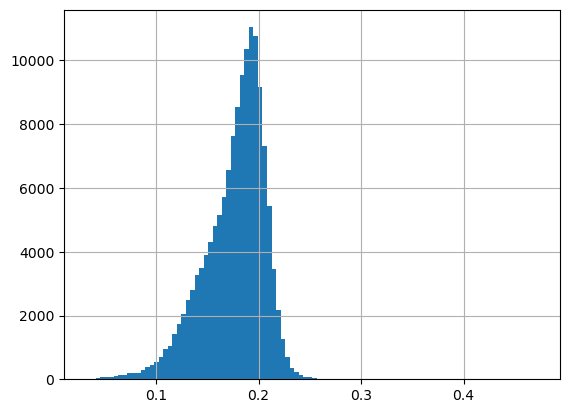

In [84]:
ids.identity.hist(bins=100)

In [85]:
ids.sort_values("identity", ascending=False)

,pdb1,seqid1,pdb2,seqid2,identity
85734,6tpk,1,7fee,1,0.472098
70062,5x33,1,7p2l,1,0.435985
116593,5jqh,1,5ndz,1,0.427152
16142,5xez,1,5x33,1,0.404545
105100,4or2,1,7p2l,1,0.398877
...,...,...,...,...,...
126489,1fap,2,5luq,1,0.037953
138224,2fqq,2,5luq,1,0.037619
126421,1fap,2,7mi6,1,0.036550
11373,6hgj,2,5vsw,3,0.032189


Highest identity is 0.47 and in general the most identical sequences are different GPCRs.

<br>

In [89]:
ids.query(f"pdb1 in {list(mmer_clust_ids.keys())} or pdb2 in {list(mmer_clust_ids.keys())}").sort_values("identity", ascending=False)

,pdb1,seqid1,pdb2,seqid2,identity
131874,6yuh,1,9ckc,1,0.320366
98096,8tb7,1,9dnm,3,0.317475
140453,7aud,1,7gqu,1,0.299144
69754,4zsk,1,9fvb,1,0.242836
127200,6thc,1,8aq6,1,0.239316
...,...,...,...,...,...
126509,1fap,2,7yg5,1,0.042641
141099,6iq4,4,7yg5,1,0.042525
86136,4z6a,1,7yg5,1,0.040994
66285,3kjn,2,7yg5,1,0.040747


Highest identity with one of the new PDBs is 0.32 between N-lysine methyltransferase SMYD2 and Histone-lysine N-methyltransferase SMYD3, but they weren't found to be in the same cluster.

<br>

## Save

In [16]:
diverse_newsf = f"{extra_path}/diverse_news.pkl"

if not os.path.isfile(diverse_newsf):
    
    with open(diverse_newsf, "wb") as f:
        pickle.dump(diverse_news, f)
else:
    with open(diverse_newsf, "rb") as f:
        diverse_news = pickle.load(f)

len(diverse_news), diverse_news

(16,
 {'7gqu': {'label_asym_id': ['D']},
  '7x6v': {'label_asym_id': ['A']},
  '7yg5': {'label_asym_id': ['V']},
  '8aq6': {'label_asym_id': ['IA']},
  '8cgw': {'label_asym_id': ['P']},
  '8f4s': {'label_asym_id': ['D']},
  '8jp0': {'label_asym_id': ['B']},
  '8qni': {'label_asym_id': ['B']},
  '8qns': {'label_asym_id': ['E']},
  '8r4b': [{'label_asym_id': ['B']}, {'label_asym_id': ['C']}],
  '8uk6': {'label_asym_id': ['C']},
  '8v81': {'label_asym_id': ['L']},
  '8vsd': {'label_asym_id': ['B', 'C']},
  '9ckc': {'label_asym_id': ['E']},
  '9dnm': {'label_asym_id': ['D']},
  '9fvb': {'label_asym_id': ['C']}})

# Pockets

## FPocket utils

In [21]:
from utils.pocket_utils import Pocket, get_pocket_view, get_pockets_info, get_mean_pocket_features

In [22]:
view_pocket = lambda pdb, pocket: get_pocket_view(
    pdb = pdb, 
    cif = Cif(pdb),
    pocket = pocket,
    pockets_path = extra_pockets_path,
    sites = news_sites[pdb]
)

## "Old" FPocket

In [18]:
def hunt_pockets(pdb):    
    path = f"{extra_pockets_path}/{pdb}"
    if os.path.isdir(path):
        return
    else:
        print(pdb)
        os.makedirs(path, exist_ok=True)
        os.system(f"cp {extra_structures_path}/{pdb}.cif {path}/")
        os.system(f"utils/external/fpocket/bin/fpocket -m 3 -M 6 -i 35 --file {path}/{pdb}.cif")

In [99]:
for pdb in tqdm(diverse_news, smoothing=0):
    hunt_pockets(pdb)

  0%|          | 0/16 [00:00<?, ?it/s]

7gqu
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7x6v
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
7yg5
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8aq6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8cgw
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8f4s
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8jp0
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8qni
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8qns
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8r4b
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8uk6
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8v81
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
8vsd
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
9ckc
***** POCKET HUNTING BEGINS ***** 
***** POCKE

QH7073 qhull warning: instead of 4757 3-dimensional points, input contains
2389 points and 0 extra coordinates.  Line 3 is the first
point, line 1 is the first comment.  Continue with 2389 points.


***** POCKET HUNTING ENDS ***** 


### Process

In [23]:
pockets = pd.DataFrame((
    pocket
    for pdb in tqdm(diverse_news, smoothing=0)
    for pocket in get_pockets_info(
        Cif(pdb), 
        sites = news_sites[pdb],
        pockets_path = extra_pockets_path
    )
))

pockets

  0%|          | 0/16 [00:00<?, ?it/s]

,pdb,pocket,nres,site_in_pocket,pocket_in_site
0,7gqu,pocket11,12,0.068966,0.166667
1,7gqu,pocket15,14,0.000000,0.000000
2,7gqu,pocket7,12,0.000000,0.000000
3,7gqu,pocket13,14,0.000000,0.000000
4,7gqu,pocket14,10,0.000000,0.000000
...,...,...,...,...,...
486,9fvb,pocket10,7,0.000000,0.000000
487,9fvb,pocket5,13,0.000000,0.000000
488,9fvb,pocket8,7,0.269231,1.000000
489,9fvb,pocket3,14,0.115385,0.214286


In [24]:
len(diverse_news), len(pockets.pdb.unique())

(16, 16)

### Pocket size

In [25]:
pockets.sort_values("nres", ascending=False)

,pdb,pocket,nres,site_in_pocket,pocket_in_site
379,8v81,pocket1,125,0.962963,0.208000
5,7gqu,pocket1,123,0.896552,0.211382
394,8v81,pocket43,105,0.000000,0.000000
330,8r4b,pocket33,91,0.000000,0.000000
270,8qni,pocket1,90,0.966667,0.322222
...,...,...,...,...,...
486,9fvb,pocket10,7,0.000000,0.000000
42,7x6v,pocket59,7,0.000000,0.000000
273,8qni,pocket17,7,0.000000,0.000000
78,7x6v,pocket54,6,0.000000,0.000000


<Axes: >

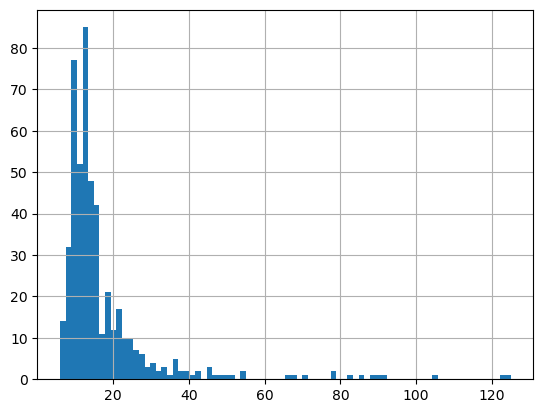

In [26]:
pockets.nres.hist(bins=80)

### Labelling

In [27]:
pockets.loc[
    pockets.loc[
        lambda x: x["site_in_pocket"] >= 0.65
    ].index, 
    "label"
] = 1
pockets["label"] = pockets["label"].fillna(0).astype(int)

pockets.sort_values("label", ascending=False)

,pdb,pocket,nres,site_in_pocket,pocket_in_site,label
244,8jp0,pocket1,78,0.781250,0.320513,1
472,9dnm,pocket9,13,0.800000,0.615385,1
5,7gqu,pocket1,123,0.896552,0.211382,1
345,8uk6,pocket1,37,0.952381,0.540541,1
270,8qni,pocket1,90,0.966667,0.322222,1
...,...,...,...,...,...,...
156,7yg5,pocket3,46,0.034483,0.021739,0
155,7yg5,pocket56,13,0.000000,0.000000,0
154,7yg5,pocket24,9,0.000000,0.000000,0
153,7yg5,pocket53,7,0.000000,0.000000,0


In [31]:
dropped = set(pockets.pdb.unique()) - set(pockets.loc[pockets.label == 1].pdb.unique())

print("Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs")
len(pockets.pdb.unique()), len(pockets.loc[pockets.label == 1].pdb.unique()), len(dropped), len(dropped)/len(pockets.pdb.unique()), dropped

Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs


(16, 9, 7, 0.4375, {'7x6v', '8cgw', '8qns', '8r4b', '8vsd', '9ckc', '9fvb'})

In [32]:
print("Total initial pockets, final pockets, positive pockets, and ratio of positive pockets")
len(pockets), len(pockets.query(f"pdb not in {list(dropped)}")), sum(pockets.label == 1), sum(pockets.label == 1)/len(pockets.query(f"pdb not in {list(dropped)}"))

Total initial pockets, final pockets, positive pockets, and ratio of positive pockets


(491, 245, 9, 0.036734693877551024)

FPocket fails to identify a considerably overlapping pocket with the allosteric site(s) for 7 cases, however most of the unsuccessful PDBs correspond to peptidic or proteic modulator molecules, while the PDBs with labelled pockets contain small-molecule modulators.

<br>

#### Small-molecule modulators only

In [33]:
peptidic = ['7x6v', '8r4b', '8qns', '8vsd', '9ckc', '9fvb']

smallmol_pockets = pockets.query(f"pdb not in {peptidic}")

In [34]:
smallmol_dropped = set(smallmol_pockets.pdb.unique()) - set(smallmol_pockets.loc[smallmol_pockets.label == 1].pdb.unique())

print("Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs")
len(smallmol_pockets.pdb.unique()), len(smallmol_pockets.loc[smallmol_pockets.label == 1].pdb.unique()), len(smallmol_dropped), len(smallmol_dropped)/len(smallmol_pockets.pdb.unique()), smallmol_dropped

Total initial PDBs, final PDBs, dropped PDBs, % of PDBs dropped, and list of dropped PDBs


(10, 9, 1, 0.1, {'8cgw'})

In [35]:
print("Total initial pockets, final pockets, positive pockets, and ratio of positive pockets")
len(smallmol_pockets), len(smallmol_pockets.query(f"pdb not in {list(smallmol_dropped)}")), sum(smallmol_pockets.label == 1), sum(smallmol_pockets.label == 1)/len(smallmol_pockets.query(f"pdb not in {list(smallmol_dropped)}"))

Total initial pockets, final pockets, positive pockets, and ratio of positive pockets


(286, 245, 9, 0.036734693877551024)

In the case of systems with small-molecule allosteric modulators, only 1 PDB does not have any positively labelled pocket.

<br>

In [36]:
final_pockets = smallmol_pockets.query(f"pdb not in {list(smallmol_dropped)}")

### Features

In [37]:
final_pockets = pd.concat(
    (
        final_pockets,
        final_pockets.apply(
            lambda row: pd.Series(
                Pocket(f"{extra_pockets_path}/{row['pdb']}/{row['pdb']}_out/pockets/{row['pocket']}_atm.cif").feats
            ), axis=1
        )
    ),
    axis=1
)

final_pockets

,pdb,pocket,nres,site_in_pocket,pocket_in_site,label,Pocket Score,Drug Score,Number of alpha spheres,Mean alpha-sphere radius,...,Local hydrophobic density Score,Number of apolar alpha sphere,Proportion of apolar alpha sphere,Total SASA,Polar SASA,Apolar SASA,Proportion of polar atoms,Alpha sphere density,Cent. of mass - Alpha Sphere max dist,Flexibility
0,7gqu,pocket11,12,0.068966,0.166667,0,-0.1526,0.0048,55.0,3.5579,...,10.6667,18.0,0.3273,192.560,87.496,105.064,46.154,5.901,13.784,0.187
1,7gqu,pocket15,14,0.000000,0.000000,0,-0.3418,0.0038,62.0,3.8528,...,14.2222,27.0,0.4355,257.675,112.759,144.915,34.694,6.557,14.498,0.353
2,7gqu,pocket7,12,0.000000,0.000000,0,-0.0541,0.0013,40.0,3.6526,...,5.0000,6.0,0.1500,121.809,61.427,60.381,46.875,4.741,11.567,0.163
3,7gqu,pocket13,14,0.000000,0.000000,0,-0.1736,0.0023,72.0,3.6145,...,16.0833,24.0,0.3333,172.144,100.894,71.250,40.476,4.966,12.631,0.119
4,7gqu,pocket14,10,0.000000,0.000000,0,-0.1955,0.0013,68.0,3.5980,...,12.4545,22.0,0.3235,193.136,102.089,91.047,40.426,5.535,14.981,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,9dnm,pocket3,18,0.000000,0.000000,0,0.4903,0.7284,63.0,3.1792,...,36.0364,55.0,0.8730,21.680,1.071,20.609,22.500,5.688,12.606,0.478
477,9dnm,pocket12,9,0.000000,0.000000,0,-0.0091,0.0024,38.0,3.4821,...,8.9091,11.0,0.2895,88.317,65.372,22.945,57.692,3.597,9.913,0.555
478,9dnm,pocket19,12,0.000000,0.000000,0,-0.1447,0.1317,65.0,3.5098,...,19.2778,36.0,0.5538,181.423,40.131,141.292,28.571,5.444,15.363,0.591
479,9dnm,pocket21,12,0.100000,0.083333,0,-0.2238,0.0019,55.0,3.6802,...,14.3529,17.0,0.3091,186.991,97.626,89.364,42.105,5.042,11.321,0.591


In [38]:
final_pockets.to_pickle(f"{extra_path}/pockets.pkl")

# Features

Copied and edited the features_scripts into `7.Extra_set`, then ran:

In [47]:
import subprocess

In [49]:
subprocess.run("""
cd 7.Extra_set &&
python features.py > features.log 2>&1 &&
python transferentropy_features.py > transferentropy.log 2>&1 &&
python prody_features.py > prody.log 2>&1 &&
python hhblits_features.py > hhblits.log 2>&1
""", shell=True)

CompletedProcess(args='\ncd 7.Extra_set &&\npython features.py > features.log 2>&1 &&\npython transferentropy_features.py > transferentropy.log 2>&1 &&\npython prody_features.py > prody.log 2>&1 &&\npython hhblits_features.py > hhblits.log 2>&1\n', returncode=0)

In [50]:
errors = pd.concat((
    pd.read_csv(f"{extra_features_path}/{f}", sep="\t", header=None) 
    for f in os.listdir(extra_features_path) 
        if f.endswith("errors.txt")
))

errors

ValueError: No objects to concatenate

In [52]:
errors_pdbs = []
missing = []

In [53]:
for pdb in final_pockets.pdb.unique():
    if pdb not in errors_pdbs:
        files = tuple(f for f in os.listdir(f"{extra_features_path}/features/{pdb}") if f.endswith(".pkl"))
        miss = tuple(
            fc 
            for fc in ('GrapheinF', 'FreeSASAF', 'DSSPF', 'MelodiaF', 'BiopythonF', 'ProDyF', 'PyRosettaF', 'TransferEntropyF', 'HHBlitsF') 
            if f"{fc}.pkl" not in files
        )
        if len(miss):
            missing.append((pdb, miss))

missing

[]

## Processing

In [54]:
from utils.features_utils import get_pdb_features

In [8]:
featuresf = f"{extra_path}/features.pkl"

if not os.path.isfile(featuresf):
    featuresd = {}
    for pdb in tqdm(final_pockets.pdb.unique(), smoothing=0):
        # if pdb not in errors_pdbs:
        if len(errors_pdbs) == 0 and len(missing) == 0:
            feats = get_pdb_features(
                Cif(pdb),
                sites = [d["site"] for d in news_sites[pdb]],
                features_path = extra_features_path
            )
            
            featuresd[pdb] = pd.concat(
                (
                    pd.DataFrame([pdb]*len(feats), columns=pd.MultiIndex.from_tuples([("Residues", "pdb")])),
                    feats
                ),
                axis=1
            )
    with open(featuresf, "wb") as f:
        pickle.dump(featuresd, f)
else:
    with open(featuresf, "rb") as f:
        featuresd = pickle.load(f)

len(featuresd), featuresd

(9,
 {'7gqu':            Residues                                                      \
      label_entity_id label_asym_id label_seq_id auth_asym_id auth_seq_id   
  0                 1             A           12            A         527   
  1                 1             A           13            A         528   
  2                 1             A           14            A         529   
  3                 1             A           15            A         530   
  4                 1             A           16            A         531   
  ..              ...           ...          ...          ...         ...   
  414               1             A          426            A         941   
  415               1             A          427            A         942   
  416               1             A          428            A         943   
  417               1             A          429            A         944   
  418               1             A          430            A   

### Per-pocket

In [9]:
final_pockets = pd.concat(
    (
        final_pockets[["pdb", "pocket", 'nres', 'site_in_pocket', 'pocket_in_site']],
        final_pockets["label"],
        final_pockets.drop(columns=["pdb", "pocket", 'nres', 'site_in_pocket', 'pocket_in_site', 'label'])
    ),
    axis=1,
    keys=["Pockets", "Label", "FPocket"]
)

final_pockets

Pockets                                              Label      FPocket  \
        pdb    pocket nres site_in_pocket pocket_in_site label Pocket Score   
0      7gqu  pocket11   12       0.068966       0.166667     0      -0.1526   
1      7gqu  pocket15   14       0.000000       0.000000     0      -0.3418   
2      7gqu   pocket7   12       0.000000       0.000000     0      -0.0541   
3      7gqu  pocket13   14       0.000000       0.000000     0      -0.1736   
4      7gqu  pocket14   10       0.000000       0.000000     0      -0.1955   
..      ...       ...  ...            ...            ...   ...          ...   
476    9dnm   pocket3   18       0.000000       0.000000     0       0.4903   
477    9dnm  pocket12    9       0.000000       0.000000     0      -0.0091   
478    9dnm  pocket19   12       0.000000       0.000000     0      -0.1447   
479    9dnm  pocket21   12       0.100000       0.083333     0      -0.2238   
480    9dnm   pocket6   14       0.000000       0.000000     0       0.1700   

                                                                 ...  \
    Drug Score Number of alpha spheres Mean alpha-sphere radius  ...   
0       0.0048                    55.0                   3.5579  ...   
1       0.0038                    62.0                   3.8528  ...   
2       0.0013                    40.0                   3.6526  ...   
3       0.0023                    72.0                   3.6145  ...   
4       0.0013                    68.0                   3.5980  ...   
..         ...                     ...                      ...  ...   
476     0.7284                    63.0                   3.1792  ...   
477     0.0024                    38.0                   3.4821  ...   
478     0.1317                    65.0                   3.5098  ...   
479     0.0019                    55.0                   3.6802  ...   
480     0.5809                    64.0                   3.3836  ...   

                                                                   \
    Local hydrophobic density Score Number of apolar alpha sphere   
0                           10.6667                          18.0   
1                           14.2222                          27.0   
2                            5.0000                           6.0   
3                           16.0833                          24.0   
4                           12.4545                          22.0   
..                              ...                           ...   
476                         36.0364                          55.0   
477                          8.9091                          11.0   
478                         19.2778                          36.0   
479                         14.3529                          17.0   
480                         33.0417                          48.0   

                                                                         \
    Proportion of apolar alpha sphere Total SASA Polar SASA Apolar SASA   
0                              0.3273    192.560     87.496     105.064   
1                              0.4355    257.675    112.759     144.915   
2                              0.1500    121.809     61.427      60.381   
3                              0.3333    172.144    100.894      71.250   
4                              0.3235    193.136    102.089      91.047   
..                                ...        ...        ...         ...   
476                            0.8730     21.680      1.071      20.609   
477                            0.2895     88.317     65.372      22.945   
478                            0.5538    181.423     40.131     141.292   
479                            0.3091    186.991     97.626      89.364   
480                            0.7500     90.733     31.559      59.174   

                                                    \
    Proportion of polar atoms Alpha sphere density   
0                      46.154                5.901   
1  

In [11]:
from utils.pocket_utils import get_mean_pocket_features
extra_pockets_path = "7.Extra_set/pockets"

In [12]:
pockets_features = pd.concat(
    (
        final_pockets,
        final_pockets.apply(
            lambda row: get_mean_pocket_features(
                row[("Pockets", "pdb")],
                row[("Pockets", "pocket")],
                pdb_features = featuresd[row[("Pockets", "pdb")]],
                pockets_path = extra_pockets_path # f"{pockets_path}/{pdb}/{pdb}_out/pockets/{pocket}_atm.cif"
            ), 
            axis=1 
        )
    ),
    axis=1
)

In [13]:
pockets_features

Pockets                                              Label      FPocket  \
        pdb    pocket nres site_in_pocket pocket_in_site label Pocket Score   
0      7gqu  pocket11   12       0.068966       0.166667     0      -0.1526   
1      7gqu  pocket15   14       0.000000       0.000000     0      -0.3418   
2      7gqu   pocket7   12       0.000000       0.000000     0      -0.0541   
3      7gqu  pocket13   14       0.000000       0.000000     0      -0.1736   
4      7gqu  pocket14   10       0.000000       0.000000     0      -0.1955   
..      ...       ...  ...            ...            ...   ...          ...   
476    9dnm   pocket3   18       0.000000       0.000000     0       0.4903   
477    9dnm  pocket12    9       0.000000       0.000000     0      -0.0091   
478    9dnm  pocket19   12       0.000000       0.000000     0      -0.1447   
479    9dnm  pocket21   12       0.100000       0.083333     0      -0.2238   
480    9dnm   pocket6   14       0.000000       0.000000     0       0.1700   

                                                                 ...  \
    Drug Score Number of alpha spheres Mean alpha-sphere radius  ...   
0       0.0048                    55.0                   3.5579  ...   
1       0.0038                    62.0                   3.8528  ...   
2       0.0013                    40.0                   3.6526  ...   
3       0.0023                    72.0                   3.6145  ...   
4       0.0013                    68.0                   3.5980  ...   
..         ...                     ...                      ...  ...   
476     0.7284                    63.0                   3.1792  ...   
477     0.0024                    38.0                   3.4821  ...   
478     0.1317                    65.0                   3.5098  ...   
479     0.0019                    55.0                   3.6802  ...   
480     0.5809                    64.0                   3.3836  ...   

      HHBlits                                                              \
         M->M      M->I      M->D      I->M      I->I      D->M      D->D   
0    0.955484  0.025227  0.019343  0.165788  0.834238  0.136031  0.863919   
1    0.974569  0.006574  0.018859  0.260971  0.453309  0.306579  0.622019   
2    0.962382  0.023266  0.014359  0.206804  0.543209  0.291031  0.625635   
3    0.962150  0.031724  0.006096  0.232774  0.767232  0.238607  0.761441   
4    0.974479  0.004489  0.021067  0.216619  0.383377  0.343837  0.456162   
..        ...       ...       ...       ...       ...       ...       ...   
476  0.876567  0.062246  0.061196  0.213815  0.508359  0.010684  0.989279   
477  0.993104  0.001887  0.004977  0.310072  0.356584  0.105642  0.894323   
478  0.927772  0.016111  0.056076  0.507445  0.492593  0.249363  0.750681   
479  0.928850  0.010917  0.060229  0.352138  0.647857  0.108113  0.891929   
480  0.990717  0.005898  0.003373  0.265164  0.449084  0.308671  0.691299   

                                    
          Neff    Neff_I    Neff_D  
0    12.327583  1.418000  2.713667  
1    11.424571  0.760786  1.323571  
2    12.056000  1.076917  1.590083  
3    12.314714  1.545143  2.180000  
4    10.979400  0.637500  1.446600  
..         ...       ...       ...  
476   7.976833  0.797944  6.292278  
477   7.297444  0.680889  1.186889  
478   7.837917  1.095000  1.295000  
479   7.866333  1.062083  3.568000  
480   5.812214  0.736286  1.167286  

[245 rows x 194 columns]

In [5]:
pockets_featuresf = f"{extra_path}/pockets_features.pkl"

if not os.path.isfile(pockets_featuresf):
    pockets_featuresd = {
        pdb: pks
        for pdb, pks in pockets_features.groupby(("Pockets", "pdb"), sort=False)
    }
    with open(pockets_featuresf, "wb") as f:
        pickle.dump(pockets_featuresd, f)
else:
    with open(pockets_featuresf, "rb") as f:
        pockets_featuresd = pickle.load(f)

len(pockets_featuresd), pockets_featuresd

(9,
 {'7gqu':    Pockets                                              Label      FPocket  \
         pdb    pocket nres site_in_pocket pocket_in_site label Pocket Score   
  0     7gqu  pocket11   12       0.068966       0.166667     0      -0.1526   
  1     7gqu  pocket15   14       0.000000       0.000000     0      -0.3418   
  2     7gqu   pocket7   12       0.000000       0.000000     0      -0.0541   
  3     7gqu  pocket13   14       0.000000       0.000000     0      -0.1736   
  4     7gqu  pocket14   10       0.000000       0.000000     0      -0.1955   
  5     7gqu   pocket1  123       0.896552       0.211382     1       0.7212   
  6     7gqu   pocket2   13       0.000000       0.000000     0       0.3342   
  7     7gqu   pocket4   13       0.206897       0.461538     0       0.0558   
  8     7gqu   pocket9   10       0.000000       0.000000     0      -0.1161   
  9     7gqu  pocket10   10       0.000000       0.000000     0      -0.1472   
  10    7gqu   pocket5   13 

# Embeddings

In [74]:
seq_embsf = f"{extra_path}/seq_embeddings.pkl"

if not os.path.isfile(seq_embsf):
    from utils.embeddings import get_embs

    seq_embsd = {}
    for (pdb, entity_id, asym_id), seq in news_seqs.items():
        if pdb in featuresd:
            if pdb not in seq_embsd:
                seq_embsd[pdb] = {}
            if entity_id not in seq_embsd[pdb]:
                seq_embsd[pdb][entity_id] = {
                    "seq": seq,
                    "embs": get_embs(seq)
                }
        
    with open(seq_embsf, "wb") as f:
        pickle.dump(seq_embsd, f)
else:
    with open(seq_embsf, "rb") as f:
        seq_embsd = pickle.load(f)

len(seq_embsd), seq_embsd

(9,
 {'7gqu': {'1': {'seq': 'MNEGEEDDDKDFLWPAPNEEQVTCLKMYFGHSSFKPVQWKVIHSVLEERRDNVAVMATGYGKSLCFQYPPVYVGKIGLVISPLISLMEDQVLQLKMSNIPACFLGSAQSENVLTDIKLGKYRIVYVTPEYCSGNMGLLQQLEADIGITLIAVDEAHCISEWGHDFRDSFRKLGSLKTALPMVPIVALTATASSSIREDIVRCLNLRNPQITCTGFDRPNLYLEVRRKTGNILQDLQPFLVKTSSHWEFEGPTIIYCPSRKMTQQVTGELRKLNLSCGTYHAGMSFSTRKDIHHRFVRDEIQCVIATIAFGMGINKADIRQVIHYGAPKDMESYYQEIGRAGRDGLQSSCHVLWAPADINLNRHLLTEIRNEKFRLYKLKMMAKMEKYLHSSRCRRQIILSHFEDKQVQKASLGIMGTEKCCDNCRSRLDHGGRLEVLFQ',
    'embs': array([[ 0.08894516, -0.18596913,  0.15290453, ...,  0.1614975 ,
            -0.02016568,  0.07081041],
           [ 0.01480306, -0.13827415,  0.12261377, ...,  0.05476979,
             0.06890018,  0.2451658 ],
           [ 0.04368159, -0.22788182,  0.03676852, ..., -0.01676617,
            -0.02108363,  0.26203698],
           ...,
           [-0.06240525, -0.10081989,  0.18563914, ...,  0.11763539,
            -0.03657404, -0.01969938],
           [ 0.02631646, -0.11250363,  0.19203039, ...,  0.24494512,
    

In [75]:
embsf = f"{extra_path}/embeddings.pkl"

if not os.path.isfile(embsf):
    embsd = {}
    for pdb, embs in tqdm(seq_embsd.items(), smoothing=0):
        residues = featuresd[pdb][["Residues", "Label"]]

        embsd[pdb] = residues.merge(
            pd.concat((
                pd.concat(
                    (
                        pd.Series([entity_id]*len(entd["seq"]), name="label_entity_id"),
                        pd.Series(range(1, len(entd["seq"])+1), name="label_seq_id", dtype=str),
                        pd.DataFrame(entd["embs"])
                    ),
                    axis=1,
                    keys=["Residues", "Residues", "Embeddings"]
                )
                for entity_id, entd in embs.items()
            )),
            on=[("Residues", "label_entity_id"), ("Residues", "label_seq_id")]
        )
        
    with open(embsf, "wb") as f:
        pickle.dump(embsd, f)
else:
    with open(embsf, "rb") as f:
        embsd = pickle.load(f)

len(embsd), embsd

  0%|          | 0/9 [00:00<?, ?it/s]

(9,
 {'7gqu':            Residues                                                      \
      label_entity_id label_asym_id label_seq_id auth_asym_id auth_seq_id   
  0                 1             A           12            A         527   
  1                 1             A           13            A         528   
  2                 1             A           14            A         529   
  3                 1             A           15            A         530   
  4                 1             A           16            A         531   
  ..              ...           ...          ...          ...         ...   
  414               1             A          426            A         941   
  415               1             A          427            A         942   
  416               1             A          428            A         943   
  417               1             A          429            A         944   
  418               1             A          430            A   

## Per-pocket

In [76]:
pockets_embeddings = pd.concat(
    (
        final_pockets[["Pockets", "Label"]],
        final_pockets.apply(
            lambda row: get_mean_pocket_features(
                row[("Pockets", "pdb")],
                row[("Pockets", "pocket")],
                pdb_features = embsd[row[("Pockets", "pdb")]],
                pockets_path = extra_pockets_path # # f"{pockets_path}/{pdb}/{pdb}_out/pockets/{pocket}_atm.cif"
            ), 
            axis=1 
        )
    ),
    axis=1,
)

pockets_embeddings

Pockets                                              Label Embeddings  \
        pdb    pocket nres site_in_pocket pocket_in_site label          0   
0      7gqu  pocket11   12       0.068966       0.166667     0   0.122964   
1      7gqu  pocket15   14       0.000000       0.000000     0   0.016717   
2      7gqu   pocket7   12       0.000000       0.000000     0   0.117456   
3      7gqu  pocket13   14       0.000000       0.000000     0   0.072116   
4      7gqu  pocket14   10       0.000000       0.000000     0  -0.016518   
..      ...       ...  ...            ...            ...   ...        ...   
476    9dnm   pocket3   18       0.000000       0.000000     0   0.009671   
477    9dnm  pocket12    9       0.000000       0.000000     0   0.129235   
478    9dnm  pocket19   12       0.000000       0.000000     0   0.034014   
479    9dnm  pocket21   12       0.100000       0.083333     0   0.231505   
480    9dnm   pocket6   14       0.000000       0.000000     0  -0.028267   

                                   ...                                \
            1         2         3  ...      1270      1271      1272   
0   -0.057836  0.025132  0.049702  ... -0.065085 -0.044014 -0.073793   
1   -0.047120  0.013164  0.133561  ...  0.024013  0.003244 -0.113016   
2   -0.016500  0.051187  0.124879  ...  0.026625 -0.051975 -0.072194   
3   -0.063116  0.008997  0.041846  ...  0.023469 -0.009854 -0.043605   
4   -0.000670  0.058966  0.195562  ... -0.082379 -0.012536 -0.119923   
..        ...       ...       ...  ...       ...       ...       ...   
476  0.110683 -0.038998  0.013540  ... -0.016199  0.022948 -0.060394   
477 -0.199746  0.021767 -0.021020  ... -0.063701 -0.077065 -0.181853   
478 -0.115734 -0.029053  0.121142  ... -0.142095 -0.080649 -0.157189   
479 -0.299182 -0.246113  0.172477  ... -0.152652 -0.165640 -0.171772   
480 -0.169558 -0.119400  0.123247  ... -0.064522 -0.169683 -0.126320   

                                                                           
         1273      1274      1275      1276      1277      1278      1279  
0    0.018020 -0.009407  0.007509 -0.040575 -0.010562  0.002488 -0.068776  
1    0.048831  0.038648 -0.017264  0.092897 -0.071856 -0.037494  0.058211  
2   -0.098085  0.018739 -0.040766  0.168357 -0.091795  0.043674  0.093908  
3    0.015310 -0.025668 -0.163595  0.154754 -0.142384  0.001709  0.068963  
4    0.070174  0.012440 -0.084665  0.110774 -0.041425 -0.181316 -0.077029  
..        ...       ...       ...       ...       ...       ...       ...  
476 -0.049710  0.068444 -0.061233  0.073234  0.041815 -0.046091 -0.001270  
477  0.267654  0.090379 -0.002508 -0.032983 -0.308934 -0.042465  0.176841  
478  0.128594  0.089593  0.053856  0.074129 -0.197947 -0.054282  0.217895  
479  0.027081  0.097176 -0.150714  0.048687 -0.417549 -0.040750  0.150318  
480 -0.057757  0.065545 -0.123232  0.075681 -0.361851  0.054643  0.221785  

[245 rows x 1286 columns]

In [4]:
pockets_embeddingsf = f"{extra_path}/pockets_embeddings.pkl"

if not os.path.isfile(pockets_embeddingsf):
    pockets_embeddingsd = {
        pdb: pks
        for pdb, pks in pockets_embeddings.groupby(("Pockets", "pdb"), sort=False)
    }
    with open(pockets_embeddingsf, "wb") as f:
        pickle.dump(pockets_embeddingsd, f)
else:
    with open(pockets_embeddingsf, "rb") as f:
        pockets_embeddingsd = pickle.load(f)

len(pockets_embeddingsd), pockets_embeddingsd

(9,
 {'7gqu':    Pockets                                              Label Embeddings  \
         pdb    pocket nres site_in_pocket pocket_in_site label          0   
  0     7gqu  pocket11   12       0.068966       0.166667     0   0.122964   
  1     7gqu  pocket15   14       0.000000       0.000000     0   0.016717   
  2     7gqu   pocket7   12       0.000000       0.000000     0   0.117456   
  3     7gqu  pocket13   14       0.000000       0.000000     0   0.072116   
  4     7gqu  pocket14   10       0.000000       0.000000     0  -0.016518   
  5     7gqu   pocket1  123       0.896552       0.211382     1   0.002504   
  6     7gqu   pocket2   13       0.000000       0.000000     0   0.131104   
  7     7gqu   pocket4   13       0.206897       0.461538     0  -0.106788   
  8     7gqu   pocket9   10       0.000000       0.000000     0  -0.009288   
  9     7gqu  pocket10   10       0.000000       0.000000     0   0.025016   
  10    7gqu   pocket5   13       0.000000       0.0